# Climate Change

In [150]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Is there a correlation between yearly global average temperature and yearly average global CO2 level ?
* Null hypothesis: There is no correlation between yearly global average temp and yearly average global CO2 levels
* Alternative hypothesis: There is a positive correlation between yearly global average temp and yearly average global CO2 levels

### If there is a correlation between an increase in global temperature and CO2 levels, then is there a relationship between a country’s average temperature and their CO2 level? Can we see a local effect on a country’s temperature from their CO2 levels?
* Null Hypothesis: A country’s increase in CO2 level does not increase the country’s average temperature (by year)
* Alternative Hypothesis: A country’s increase in CO2 level does increase the country’s average temperature.

In [151]:
# Import data from dataset temperatures by country
df_temp = pd.read_csv("data_sets/GlobalLandTemperaturesByCountry.csv")
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [152]:
np.dtype(df_temp["dt"])

dtype('O')

In [153]:
# Drop NaN values
df_temp.dropna(how = "any", inplace = True)
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [154]:
# Retrieving first value in list of values separated by hyphen
splited_series = df_temp['dt'].str.split('-').str[0]
splited_series

0         1743
5         1744
6         1744
7         1744
8         1744
          ... 
577456    2013
577457    2013
577458    2013
577459    2013
577460    2013
Name: dt, Length: 544811, dtype: object

In [156]:
# Adding as new series and check whether new column for year is added
df_temp["Year"] = splited_series.astype("int64")
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [157]:
#check data type
print(np.dtype(df_temp["Year"]))

int64


In [158]:
# Drop dt column
df_temp.drop(["dt"], axis=1, inplace=True)

In [159]:
# Create DF with data regions
region_df = pd.read_excel("data_sets/climate_change_data.xls", sheet_name="Country")
region_df.head()

,Country code,Country name,Capital city,Region,Income group,Lending category
0,EAP,East Asia & Pacific,..,Aggregates,Aggregates,Aggregates
1,ECA,Europe & Central Asia,..,Aggregates,Aggregates,Aggregates
2,EMU,Euro area,..,Aggregates,Aggregates,Aggregates
3,HIC,High income,..,Aggregates,Aggregates,Aggregates
4,LAC,Latin America & Caribbean,..,Aggregates,Aggregates,Aggregates


In [160]:
list(region_df)

['Country code',
 'Country name',
 'Capital city',
 'Region',
 'Income group',
 'Lending category']

In [162]:
# Create df for regions
df = pd.DataFrame(region_df, columns= ['Region', "Country name"])
df.rename(columns = {"Country name": "Country"}, inplace=True)
df

,Region,Country
0,Aggregates,East Asia & Pacific
1,Aggregates,Europe & Central Asia
2,Aggregates,Euro area
3,Aggregates,High income
4,Aggregates,Latin America & Caribbean
...,...,...
228,Middle East & North Africa,"Yemen, Rep."
229,Sub-Saharan Africa,South Africa
230,Sub-Saharan Africa,"Congo, Dem. Rep."
231,Sub-Saharan Africa,Zambia


In [163]:
# Add column for region into df_temp
df_temp["Region"]=""
df_temp

,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Region
0,4.384,2.294,Åland,1743,
5,1.530,4.680,Åland,1744,
6,6.702,1.789,Åland,1744,
7,11.609,1.577,Åland,1744,
8,15.342,1.410,Åland,1744,
...,...,...,...,...,...
577456,21.142,0.495,Zimbabwe,2013,
577457,19.059,1.022,Zimbabwe,2013,
577458,17.613,0.473,Zimbabwe,2013,
577459,17.000,0.453,Zimbabwe,2013,


In [ ]:
# Populate Region column through a merge
df_final = pd.merge(df_temp, df, on='Country')
df_final.drop(["Region_x", "AverageTemperatureUncertainty"],axis=1, inplace=True)
df_final.rename(columns = {"Region_y": "Region"}, inplace=True)
df_final[["Year", "Region", "Country", "AverageTemperature"]]

# Clean NAN value from merged dataframe 
df_final.dropna(inplace=True)
df_final.transpose()

In [244]:
# DF with average temperature by region and by year
df_final.groupby(["Region", "Year"])["AverageTemperature"].mean()


Region               Year
East Asia & Pacific  1816    24.933300
                     1817    24.647833
                     1818    25.314583
                     1819    24.706167
                     1820    13.768238
                               ...    
Sub-Saharan Africa   2009    24.973327
                     2010    25.265121
                     2011    24.839359
                     2012    24.749821
                     2013    24.915619
Name: AverageTemperature, Length: 1521, dtype: float64

In [ ]:
x = df_final["Region"]
y = df_final["AverageTemperature"]
plt.bar(x,y, color='b', align="center")
plt.show

In [236]:
# Bar charts for avg temp per region NOT NEEDED FOR SLIDES because need trends across the years, also results seem weird?
x = df_temp
print(x)
#y = df_temp_fin["AverageTemperature"]
#plt.bar(x,y, color='b', align="center")
#plt.xlabel("Region")
#plt.ylabel("Average temperature")
#plt.title("Average temperature per region across 1838-2013")
#tick_locations = [value for value in x]
#plt.xticks(x, rotation="vertical")
#plt.show()

Int64Index([     0,      5,      6,      7,      8,     10,     11,     12,
                13,     14,
            ...
            577451, 577452, 577453, 577454, 577455, 577456, 577457, 577458,
            577459, 577460],
           dtype='int64', length=544811)


In [168]:
#Line charts per region
df_years = df_final["Year"]#.sort_values(by="Year", ascending=True, inplace=False)
#x = df_final.sort_values(by="Year", ascending=True, inplace=False)
#y = df_final["Region"]=="South Asia"["AverageTemperature"]

print(x)
#plt.plot(x,y, color='b', align="center")

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'Sub-Saharan Africa' 'Latin America & Caribbean'
 'North America']


In [201]:
# Read CO2 data from csv file 
co2_df = pd.read_csv("data_sets/CO2emission.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    co2_df=co2_df.drop(columns=[f"{x}"])
    
co2_df.drop(["Country Code", "Indicator Name", "Indicator Code"],axis=1, inplace=True)
co2_df.rename(columns = {"Country Name": "Country"}, inplace=True)
co2_df.head()

# Add column for region into df_temp
co2_df["Region"]=""
co2_df

# Populate Region column through merge on country
co2_df = pd.merge(co2_df, df, on='Country')
co2_df.head()
co2_df.drop(["Region_x"],axis=1, inplace=True)
co2_df.rename(columns = {"Region_y": "Region"}, inplace=True)

# Clean NAN value from merged dataframe 
co2_df.dropna(inplace=True)
co2_df.head()

co2_df.set_index(['Country', "Region"])


,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,Region,,,,,,,,,,,,,,,,,,,,,
Aruba,Latin America & Caribbean,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,9933.903,12236.779,11378.701,14891.687,...,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746,898.415
Afghanistan,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,942.419,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
Angola,Sub-Saharan Africa,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,2786.920,...,22266.024,25151.953,25709.337,27792.193,29057.308,30586.447,34176.440,33692.396,44851.077,34583.477
Albania,Europe & Central Asia,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,3245.295,...,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4924.781,4913.780,5489.499,4616.753
United Arab Emirates,Middle East & North Africa,11.001,11.001,18.335,22.002,18.335,22.002,25.669,916.750,1243.113,20524.199,...,123728.247,135554.322,157167.620,168274.963,158623.419,171626.601,219792.646,220713.063,226143.890,194765.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,East Asia & Pacific,5944.207,6164.227,7550.353,7036.973,7719.035,8250.750,8782.465,7832.712,8393.763,8511.107,...,102742.006,104872.533,117996.726,128631.026,142737.975,152169.499,142631.632,147230.050,167336.211,188329.786
World,Aggregates,9420.523,9460.860,9849.562,10388.611,10982.665,11477.710,12057.096,12442.131,13076.522,13861.260,...,30513.107,31033.821,32119.253,31272.176,33443.040,34539.473,35305.876,35745.916,35841.258,35976.937
Samoa,East Asia & Pacific,14.668,18.335,18.335,22.002,25.669,29.336,25.669,25.669,29.336,29.336,...,165.015,172.349,179.683,187.017,187.017,201.685,198.018,198.018,209.019,234.688


In [203]:
# Group by year for each region and show average co2 per year
co2_fin = co2_df.groupby(["Region"]).mean()
co2_fin.transpose()
#co2_eca.groupby(["Year"])["AverageTemperature"].mean()
#co2_mena.groupby(["Year"])["AverageTemperature"].mean()
#co2_eap.groupby(["Year"])["AverageTemperature"].mean()
#co2_ssa.groupby(["Year"])["AverageTemperature"].mean()
#co2_lac.groupby(["Year"])["AverageTemperature"].mean()
#co2_na.groupby(["Year"])["AverageTemperature"].mean()

Region,Aggregates,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1960,1.723510e+06,45352.186654,111454.21128,8513.935829,5191.314,1.027916e+06,25274.186333,3266.991417
1961,1.696553e+06,38950.168808,114773.43300,8711.744286,5519.028,1.024955e+06,27104.019333,3417.949583
1962,1.739814e+06,35390.217000,120507.74092,9253.203029,6027.969,1.064850e+06,29836.545500,3537.941972
1963,1.841498e+06,37011.454115,128150.50232,9244.507000,7002.426,1.110163e+06,32408.946000,3709.170500
1964,1.942305e+06,38968.926923,134947.50684,9968.687114,8138.810,1.164666e+06,31997.019667,4071.184889
1965,2.058918e+06,42253.712692,141384.55864,10277.658057,9700.180,1.214419e+06,34961.178000,4503.483444
1966,2.172377e+06,45643.995231,147720.69460,10780.560914,11091.710,1.273800e+06,36060.666833,4583.138833
1967,2.235005e+06,45816.485269,151652.30532,11619.256200,11835.532,1.325940e+06,36638.219333,4762.210667
1968,2.360103e+06,50847.468231,158374.50304,12349.303514,13699.719,1.378373e+06,40255.103667,4846.857250
1969,2.526528e+06,59430.927962,165935.27032,13436.307086,15899.919,1.444116e+06,40728.757833,5286.184222


In [170]:
# Combine datasets and create plots

In [171]:
# Print regions
df_final["Region"].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

In [172]:
# Create DFs for temp and CO2 per region 
df_sa = co2_temp[co2_temp["Region"]=="South Asia"]
df_eca  = co2_temp[co2_temp["Region"]=="Europe & Central Asia"]
df_mena = co2_temp[co2_temp["Region"]=="Middle East & North Africa"]
df_eap = co2_temp[co2_temp["Region"]=="East Asia & Pacific"]
df_ssa = co2_temp[co2_temp["Region"]=="Sub-Saharan Africa"]
df_lac = co2_temp[co2_temp["Region"]=="Latin America & Caribbean"]
df_na = co2_temp[co2_temp["Region"]=="North America"]


In [173]:
# show df per region, test
df_sa

,AverageTemperature,Country,Year,Region,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,13.008,Afghanistan,1838,South Asia,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
1,23.950,Afghanistan,1838,South Asia,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
2,26.877,Afghanistan,1838,South Asia,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
3,24.938,Afghanistan,1838,South Asia,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
4,18.981,Afghanistan,1838,South Asia,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325224,29.413,Sri Lanka,2013,South Asia,LKA,CO2 emissions (kt),EN.ATM.CO2E.KT,2258.872,2335.879,2563.233,...,11976.422,12354.123,12207.443,13175.531,13263.539,15137.376,16061.460,14913.689,17924.296,20113.495
325225,29.389,Sri Lanka,2013,South Asia,LKA,CO2 emissions (kt),EN.ATM.CO2E.KT,2258.872,2335.879,2563.233,...,11976.422,12354.123,12207.443,13175.531,13263.539,15137.376,16061.460,14913.689,17924.296,20113.495
325226,28.434,Sri Lanka,2013,South Asia,LKA,CO2 emissions (kt),EN.ATM.CO2E.KT,2258.872,2335.879,2563.233,...,11976.422,12354.123,12207.443,13175.531,13263.539,15137.376,16061.460,14913.689,17924.296,20113.495
325227,28.283,Sri Lanka,2013,South Asia,LKA,CO2 emissions (kt),EN.ATM.CO2E.KT,2258.872,2335.879,2563.233,...,11976.422,12354.123,12207.443,13175.531,13263.539,15137.376,16061.460,14913.689,17924.296,20113.495


In [174]:
# Group by year for each region 


In [175]:
# Group by year for each region and show average temperature per year
temp_sa.groupby(["Year"])["AverageTemperature"].mean()
temp_eca.groupby(["Year"])["AverageTemperature"].mean()
temp_mena.groupby(["Year"])["AverageTemperature"].mean()
temp_eap.groupby(["Year"])["AverageTemperature"].mean()
temp_ssa.groupby(["Year"])["AverageTemperature"].mean()
temp_lac.groupby(["Year"])["AverageTemperature"].mean()
temp_na.groupby(["Year"])["AverageTemperature"].mean()

Year
1768   -1.157000
1769    3.509313
1774   -5.743167
1775    2.644167
1776    1.055174
          ...   
2009    2.501000
2010    3.808833
2011    2.996417
2012    3.542125
2013    4.828222
Name: AverageTemperature, Length: 216, dtype: float64

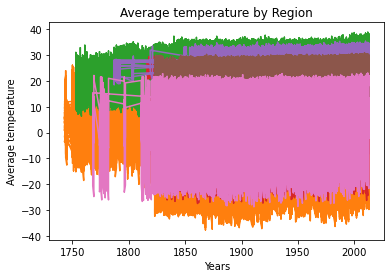

<Figure size 432x288 with 0 Axes>

In [177]:
# Line plot South Asia
x_sa = temp_sa["Year"]
y_sa = temp_sa["AverageTemperature"]
plt.plot(x_sa, y_sa)

# Line plot eca
x_eca = temp_eca["Year"]
y_eca = temp_eca["AverageTemperature"]
plt.plot(x_eca, y_eca)

# Line plot mena
x_mena = temp_mena["Year"]
y_mena = temp_mena["AverageTemperature"]
plt.plot(x_mena, y_mena)

# Line plot eap
x_eap = temp_eap["Year"]
y_eap = temp_eap["AverageTemperature"]
plt.plot(x_eap, y_eap)

# Line plot ssa
x_ssa = temp_ssa["Year"]
y_ssa = temp_ssa["AverageTemperature"]
plt.plot(x_ssa, y_ssa)

# Line plot lac
x_lac = temp_lac["Year"]
y_lac = temp_lac["AverageTemperature"]
plt.plot(x_lac, y_lac)

# Line plot na
x_na = temp_na["Year"]
y_na = temp_na["AverageTemperature"]
plt.plot(x_na, y_na)



# Set a Title and labels
plt.title("Average temperature by Region")
plt.xlabel("Years")
plt.ylabel("Average temperature")

plt.show()
plt.tight_layout()

In [178]:
# Group by year for each region and show CO2 per year

In [180]:
temp_sa.groupby(["Year"])["AverageTemperature"].mean()
temp_eca.groupby(["Year"])["AverageTemperature"].mean()
temp_mena.groupby(["Year"])["AverageTemperature"].mean()
temp_eap.groupby(["Year"])["AverageTemperature"].mean()
temp_ssa.groupby(["Year"])["AverageTemperature"].mean()
temp_lac.groupby(["Year"])["AverageTemperature"].mean()
temp_na.groupby(["Year"])["AverageTemperature"].mean()

# test show
temp_na

,AverageTemperature,Country,Year,Region
64287,5.257,Canada,1768,North America
64288,-3.393,Canada,1768,North America
64289,-12.829,Canada,1768,North America
64290,-20.582,Canada,1768,North America
64291,-24.756,Canada,1769,North America
...,...,...,...,...
372506,14.073,United States,2013,North America
372507,20.198,United States,2013,North America
372508,22.074,United States,2013,North America
372509,21.168,United States,2013,North America


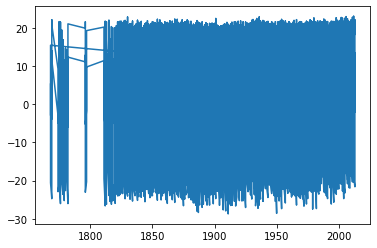

In [183]:
x = temp_na["Year"]
y = temp_na["AverageTemperature"]
plt.plot(x,y)

### Is there a correlation between a country’s wealth (GDP per Capita) and its yearly average CO2 emissions? 
* Null hypothesis: Wealth of a country does not affect CO2 emissions. 
* Alternative hypothesis: The wealthier a country, the more CO2 they emit.

### Is there a correlation between global average temperature and global population? (population value to be taken at the end of each year)
* Null hypothesis: There is no correlation between global yearly average temp and global population.
* Alternative hypothesis: There is a positive correlation between global yearly average temp and global population.

Does this correlation (population vs temperature) exist in individual countries, or does this vary depending on location? Perfectly sets us up for the next 2Q’s

### Is there a correlation between a specific country’s CO2 levels and Temperature vs happiness Index? 
* Null hypothesis: There is no correlation between CO2 levels/Temperature and happiness index
* Alternative hypothesis: As CO2 levels/Temperature increases, citizens of a country is less happy 

### Is there a correlation between a country’s yearly average CO2 levels and life expectancy? Does a country’s CO2 level affect the life expectancy of a population?
* Null hypothesis: There is no correlation between a country’s yearly average CO2 level
* Alternative hypothesis: As CO2 levels increase, a population’s life expectancy decreases.